# Package Installation

In [100]:
library(demography)
library(StMoMo)
library(lifecontingencies)
library(stats4)
library(sde)

# Data Retrieval

In [101]:
source("credentials.R")
source("Mortality Scripts.R")
DNKdata <- hmd.mx(country = "DNK", username = username, password = password)

# Get the central exposure from Danish male subpopulation ages 50-99 from 1970 to 2014
DNKmales = DNKdata[["rate"]]$male[51:100, 145:180]

# Parameter Estimation

In [102]:
source("Mortality Scripts.R")
model = affine_fit(
  model = "CIR",
  fact_dep = FALSE,
  n_factors = 3,
  data = DNKmales,
  max_iter = 200,
  tolerance = 1
)

In [137]:
# Append the estimated parameters in a list to be inputted in future functions
param_est = model$fit$par_est
param = list(x0 = as.numeric(param_est$x0), delta = as.numeric(param_est$delta), kappa = as.numeric(param_est$kappa), sigma = as.numeric(param_est$sigma), theta_P = as.numeric(param_est$theta_P),  r1 = as.numeric(param_est$r1), r2 = as.numeric(param_est$r2), rc = as.numeric(param_est$rc))

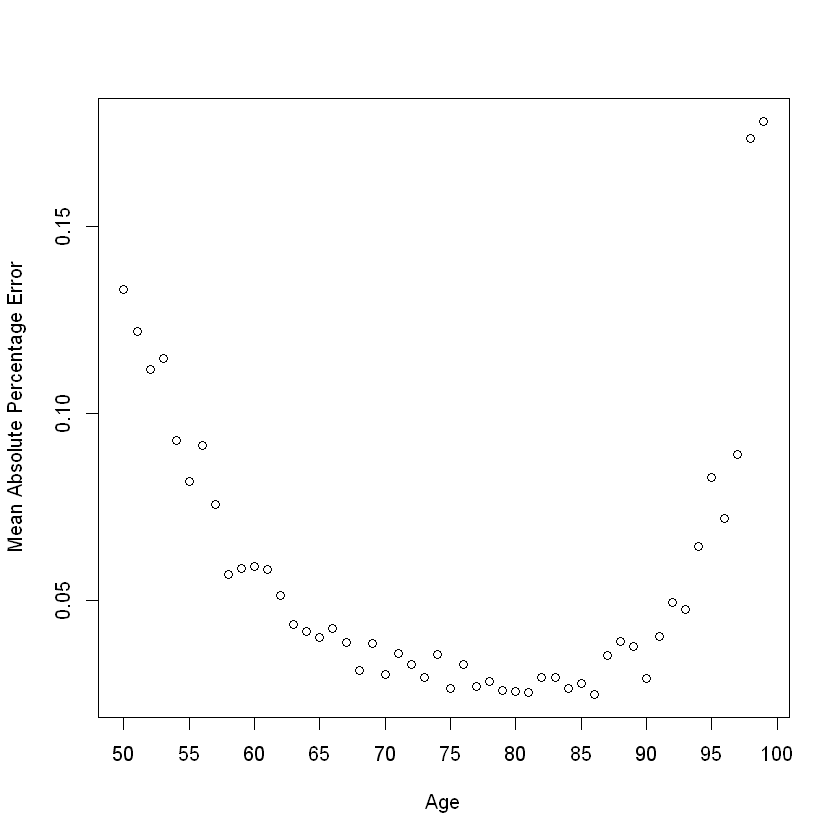

In [141]:
# Calculate the Mean Absolute Percentage Error (MAPE)
source("Mortality Scripts.R")
estimated_mortality = mubar_hat(
  model = "CIR",
  fact_dep = FALSE,
  n_factors = 3,
  parameters = param,
  data = DNKmales
)

MAPE = MAPE_row(DNKmales, estimated_mortality)
plot(seq(50,99,1), MAPE, xlab = "Age", ylab = "Mean Absolute Percentage Error")
axis(side = 1, at = seq(50,99,5))
box()

# Survival Curve

In [142]:
source('Mortality Scripts.R')
domestic_St = domestic_mubar_hat(
  model = "CIR",
  fact_dep = FALSE,
  parameters = param,
  data = DNKmales
)

In [143]:
source('Mortality Scripts.R')
foreign_St = foreign_mubar_hat(
  model = "CIR",
  fact_dep = FALSE,
  parameters = param,
  data = DNKmales
)

In [146]:
head(domestic_St)
head(foreign_St)

0.002072606,0.002242101,0.002497925,0.002992235,0.004307651,0.006642861,0.010191958,0.013956636,0.016992705,0.018440563,⋯,0.013321395,0.013474709,0.013515874,0.012918580,0.012489465,0.012320328,0.011598604,0.011098925,0.010709802,0.010312328
0.002256030,0.002374200,0.002499697,0.002691870,0.003372645,0.004523819,0.006294984,0.008143522,0.009643390,0.010369562,⋯,0.007578668,0.007643382,0.007635684,0.007322348,0.007097682,0.006990906,0.006590498,0.006325230,0.006116112,0.005881734
0.002485632,0.002591299,0.002673020,0.002756905,0.003229310,0.003983542,0.005161595,0.006366761,0.007352059,0.007837977,⋯,0.005791303,0.005824838,0.005796956,0.005576248,0.005418339,0.005329290,0.005030538,0.004841282,0.004690159,0.004505236
0.002752882,0.002856465,0.002915998,0.002938882,0.003309979,0.003863691,0.004744765,0.005624031,0.006349777,0.006715849,⋯,0.005012441,0.005028898,0.004987396,0.004811171,0.004685381,0.004602425,0.004349570,0.004196397,0.004072456,0.003907817
0.003060386,0.003166742,0.003212670,0.003192337,0.003505425,0.003936847,0.004639327,0.005318984,0.005886813,0.006181247,⋯,0.004655957,0.004660729,0.004607652,0.004456348,0.004348612,0.004266640,0.004036564,0.003903183,0.003793799,0.003637040
0.003413346,0.003525595,0.003562161,0.003506362,0.003783569,0.004131476,0.004714484,0.005256977,0.005717329,0.005964275,⋯,0.004529738,0.004525275,0.004461059,0.004324592,0.004227668,0.004143665,0.003923987,0.003801934,0.003700494,0.003544675


0.007348373,0.007512855,0.007515614,0.007242152,0.007350755,0.007208008,0.007244430,0.007219300,0.007045846,0.006952384,⋯,0.004425891,0.004488598,0.004292253,0.004102290,0.003980881,0.003878341,0.003625778,0.003504591,0.003340006,0.003239774
0.007947368,0.008124063,0.008126870,0.007831060,0.007948678,0.007795037,0.007834111,0.007805656,0.007619024,0.007519110,⋯,0.004800192,0.004866787,0.004654932,0.004450618,0.004320014,0.004208999,0.003936299,0.003805638,0.003628531,0.003519279
0.008609406,0.008799461,0.008802298,0.008481721,0.008609349,0.008443745,0.008485713,0.008453392,0.008252297,0.008145401,⋯,0.005215231,0.005285960,0.005056991,0.004836940,0.004696249,0.004575829,0.004280885,0.004139787,0.003948934,0.003829568
0.009341680,0.009546349,0.009549189,0.009201141,0.009339896,0.009161150,0.009206274,0.009169454,0.008952483,0.008838039,⋯,0.005675887,0.005750995,0.005503134,0.005265822,0.005114063,0.004983197,0.004663663,0.004511060,0.004305114,0.004174391
0.010152178,0.010372830,0.010375639,0.009997093,0.010148229,0.009955045,0.010003608,0.009961545,0.009727144,0.009604555,⋯,0.006187630,0.006267356,0.005998627,0.005742383,0.005578480,0.005435998,0.005089265,0.004923974,0.004701456,0.004557962
0.011049755,0.011287878,0.011290612,0.010878184,0.011043106,0.010834062,0.010886371,0.010838186,0.010584653,0.010453290,⋯,0.006756579,0.006841149,0.006549360,0.006272357,0.006095131,0.005939721,0.005562887,0.005383601,0.005142886,0.004985012
